# Regularized Linear Regression and Bias-Variance
This Matlab code has been completed as part of [Machine Learning](https://www.coursera.org/learn/machine-learning)
course in Coursera given by Prof. Andrew Ng

------------
This note demonstrates the regularized linear regression and different bias-variance properties.

This notebook includes:

- <a href='#part1'>Part 1: Visualizing the data</a>
- <a href='#part2'>Part 2: Regularized Linear Regression Cost</a>
- <a href='#part3'>Part 3: Bias-variance</a> 
- <a href='#part4'>Part 4: Polynomial regression</a> 

This code requires the following functions
* <a href='https://github.com/linhvannguyen/MachineLearning_AndrewNG/blob/master/matlab/funcs/funcs_07_BiasVariance_linearRegCostFunction.m'>funcs_07_BiasVariance_linearRegCostFunction.m</a> 

In [1]:
clear all; close all; clc; warning off;
addpath('../data/') % add path to directory containing data files
addpath('./funcs/') % add path to directory containing subfunction files

## Part 1: Visualizing the data  <a id='part1'></a>

The dataset containing historical records on the change in the water level, $x$, and the amount of water flowing out of the dam, $y$. This dataset is divided into three parts:
* A training set to learn the model: $(X, y)$
* A cross validation set for determining the regularization parameter: $(X^{val}, y^{val})$
* A test set for evaluating performance. These are "unseen" examples which remain "untouched" during the training: $(X^{test}, y^{test})$

The following plots the training data. In the following parts, we will implement linear regression and use that to fit a straight line to the data and plot learning curves. Following that, we will implement polynomial regression to find a better fit to the data.

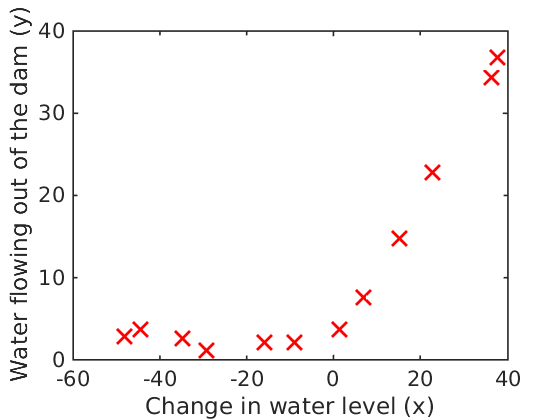

In [2]:
load ('data_07_BiasVariance.mat');

% Number of examples
m_train = size(X, 1);
m_val = size(Xval, 1);
m_test = size(Xtest, 1);

% add intercept
X_intercept=[ones(m_train, 1) X];
Xval_intercept=[ones(size(Xval, 1), 1) Xval];
Xtest_intercept=[ones(size(Xtest, 1), 1) Xtest];

% Plot training data
plot(X, y, 'rx', 'MarkerSize', 10, 'LineWidth', 1.5);
xlabel('Change in water level (x)');
ylabel('Water flowing out of the dam (y)');

## Part 2: Regularized Linear Regression Cost  <a id='part2'></a>

This part implement regularized linear regression to predict the amount of water flowing out of a dam using the change of water level in a reservoir. Some diagnostics of debugging learning algorithms and examine the effects of bias v.s. variance are also presented.

#### Regularized linear regression cost function
Recall that regularized linear regression has the following cost function:

$$J(\theta)=\frac{1}{2m}\sum_{i=1}^{m}\left( h_{\theta} \left(x^{(i)}\right) - y^{(i)} \right)^2 + \frac{\lambda}{2m}\sum_{j=1}^{n}\theta_j^2$$

where $\lambda$ is a regularization parameter which controls the degree of regularization (thus, help preventing overfitting). The regularization term puts a penalty on the overal cost J. As the magnitudes of the model parameters $\theta_j$ increase, the penalty increases as well. Note that you should not regularize the $\theta_0$ term. 

#### Regularized linear regression gradient
The partial derivative of regularized linear regression’s cost for $\theta_j$ is defined as:

$$\frac{\partial J(\theta)}{\partial \theta_j}=\frac{1}{m}\sum_{i=1}^{m} \left(h_{\theta}\left(x^{(i)}\right) - y^{(i)}\right)x^{(i)}_j \qquad for \quad j= 0$$

and 

$$\frac{\partial J(\theta)}{\partial \theta_j}=\frac{1}{m}\sum_{i=1}^{m} \left(h_{\theta}\left(x^{(i)}\right) - y^{(i)}\right)x^{(i)}_j + \frac{\lambda}{m}\theta_j \qquad for \quad j\geq 1 $$

The above cost and gradients are estimated in the <a href='#funcs_07_BiasVariance_linearRegCostFunction.m'>funcs_07_BiasVariance_linearRegCostFunction</a> function.

In [3]:
theta = [1 ; 1];
[J, grad] = funcs_07_BiasVariance_linearRegCostFunction([ones(m_train, 1) X], y, theta, 1);

fprintf('Cost at theta = [1 ; 1]: %f \n', J);
fprintf('Gradient at theta = [1 ; 1]:  [%f; %f] \n', grad(1), grad(2));

Cost at theta = [1 ; 1]: 303.993192 
Gradient at theta = [1 ; 1]:  [-15.303016; 598.250744]

#### Fitting linear regression
This training function uses ** *fmincg* ** to optimize the cost function. The regularization parameter $\lambda$ is set to zero. Because the current implementation of linear regression is trying to fit a 2-dimensional $\theta$,
regularization will not be incredibly helpful for a $\theta$ of such low dimension.

In [4]:
lambda = 0;
X_intercept=[ones(m_train, 1) X];
initial_theta = zeros(size(X_intercept, 2), 1); 

% Create "short hand" for the cost function to be minimized
costFunction = @(t) funcs_07_BiasVariance_linearRegCostFunction(X_intercept, y, t, lambda);

% Now, costFunction is a function that takes in only one argument
options = optimset('MaxIter', 200, 'GradObj', 'on');

% Minimize using fmincg
theta = funcs_fmincg(costFunction, initial_theta, options);

Last iteration (   8 th) | Cost: 2.237391e+01

The best fit line as in the plot show that the model is not a good fit to the data because the data has a non-linear pattern. While visualizing the best fit as shown is one possible way to debug your learning algorithm, it is not always easy to visualize the data and model.

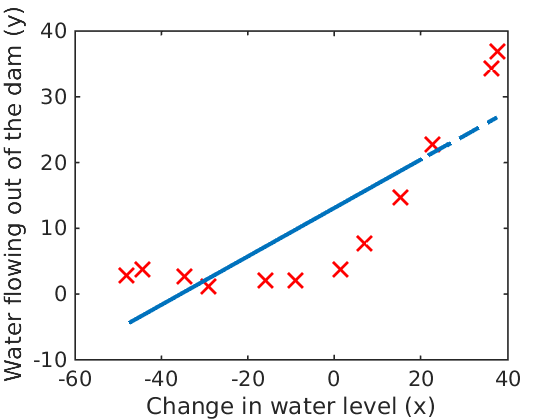

In [5]:
plot(X, y, 'rx', 'MarkerSize', 10, 'LineWidth', 1.5);
xlabel('Change in water level (x)');
ylabel('Water flowing out of the dam (y)');
hold on;
plot(X, [ones(m_train, 1) X]*theta, '--', 'LineWidth', 2)
hold off;

## Part 3: Bias-variance  <a id='part3'></a>

An important concept in machine learning is the bias-variance tradeoff. Models with high bias are not complex enough for the data and tend to underfit, while models with high variance overfit to the training data.

### Learning curves
The learning curves plots training and cross validation error as a function of training set size. This curve will be useful in debugging learning algorithms.

To plot the learning curve, we need a training and cross validation set error for different training set sizes. To obtain different training set sizes, different subsets of the original training set X are used. Specifically, for a training set size of i, the first i examples are used (i.e., X(1:i,:) and y(1:i)).

In [6]:
lambda = 0;
options = optimset('MaxIter', 200, 'GradObj', 'on');

%  the train and cross validation set errors for a learning curve
error_train = zeros(m_train, 1);
error_val   = zeros(m_train, 1);

for i=1:m_train
    xi=[ones(i, 1) X(1:i,:)];
    yi=y(1:i);
    
    initial_theta = zeros(size(xi, 2), 1); 
    costFunction = @(t) funcs_07_BiasVariance_linearRegCostFunction(xi, yi, t, lambda);
    theta = funcs_fmincg(costFunction, initial_theta, options);

    [error_train(i), ~] = funcs_07_BiasVariance_linearRegCostFunction(xi, yi, theta, 0);
    [error_val(i), ~] = funcs_07_BiasVariance_linearRegCostFunction(Xval_intercept, yval, theta, 0);
end

Last iteration (   5 th) | Cost: 0.000000e+00
Last iteration (   5 th) | Cost: 9.860761e-32
Last iteration (   5 th) | Cost: 3.286595e+00
Last iteration (  30 th) | Cost: 2.842678e+00
Last iteration (  25 th) | Cost: 1.315405e+01
Last iteration (  26 th) | Cost: 1.944396e+01
Last iteration (  16 th) | Cost: 2.009852e+01
Last iteration (  27 th) | Cost: 1.817286e+01
Last iteration (   9 th) | Cost: 2.260941e+01
Last iteration (  30 th) | Cost: 2.326146e+01
Last iteration (  12 th) | Cost: 2.431725e+01
Last iteration (   8 th) | Cost: 2.237391e+01

In the following plot, both the train error and cross validation error are high when the number of training examples is increased. This reflects a **high bias** problem in the model – the linear regression model is too simple and is unable to fit our dataset well. The next section will discuss about polynomial regression to fit a better model for this dataset.

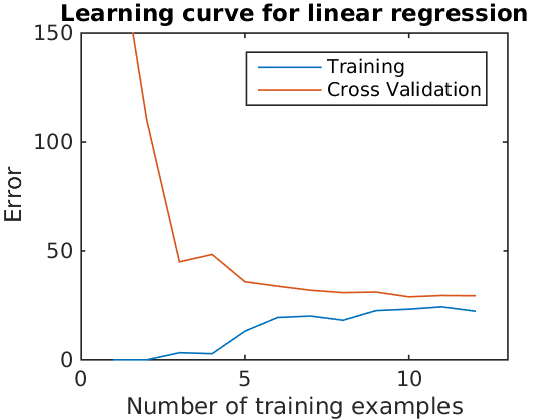

# Training Examples	Train Error	Cross Validation Error
  	1		0.000000	205.121096
  	2		0.000000	110.300366
  	3		3.286595	45.010231
  	4		2.842678	48.368911
  	5		13.154049	35.865165
  	6		19.443963	33.829962
  	7		20.098522	31.970986
  	8		18.172859	30.862446
  	9		22.609405	31.135998
  	10		23.261462	28.936207
  	11		24.317250	29.551432
  	12		22.373906	29.433818

In [7]:
plot(1:m_train, error_train, 1:m_train, error_val);
title('Learning curve for linear regression')
legend('Training', 'Cross Validation')
xlabel('Number of training examples')
ylabel('Error')
axis([0 13 0 150])

fprintf('# Training Examples\tTrain Error\tCross Validation Error\n');
for i = 1:m_train
    fprintf('  \t%d\t\t%f\t%f\n', i, error_train(i), error_val(i));
end

## Part 4: Polynomial regression  <a id='part4'></a>

The problem with our linear model was that it was too simple for the data and resulted in underfitting (high bias). This part addresses this problem by adding more features.

In polynomial regression, the hypothesis has the form:
$$ h_{\theta}(x) = \theta_0 + \theta_1 x^1 + \theta_2 x^2 + · · · + \theta_p x^p
= \theta_0 + \theta_1 x_1 + \theta_2 x_2 + · · · + \theta_p x_p$$

By defining $x_i = x^i$, a linear regression model is obtained where the features are the various powers of the original value (waterLevel). 

In [8]:
p = 8;

% Training data
% Map X onto Polynomial Features and Normalize
X_poly = zeros(numel(X), p);
for i=1:p
    X_poly(:, i) = X.^i;
end

mu = mean(X_poly);
X_poly = bsxfun(@minus, X_poly, mu);
sigma = std(X_poly);
X_poly = bsxfun(@rdivide, X_poly, sigma);

X_poly = [ones(m_train, 1), X_poly];

% CV data
X_poly_val = zeros(numel(Xval), p);
for i=1:p
    X_poly_val(:, i) = Xval.^i;
end
X_poly_val = bsxfun(@minus, X_poly_val, mu);
X_poly_val = bsxfun(@rdivide, X_poly_val, sigma);
X_poly_val = [ones(m_val, 1), X_poly_val];

% Testing data
X_poly_test = zeros(numel(Xtest), p);
for i=1:p
    X_poly_test(:, i) = Xtest.^i;
end

X_poly_test = bsxfun(@minus, X_poly_test, mu);
X_poly_test = bsxfun(@rdivide, X_poly_test, sigma);
X_poly_test = [ones(m_test, 1), X_poly_test];

### Learning Polynomial Regression

Though adding polynomial terms in the feature vector, the linear regression optimization problem is solved exactly as before. The polynomial terms have simply turned into features that we can use for linear regression. 

A polynomial of degree 8 is chosen. Notice also that if we run the training directly on the projected data, the model will not work well as the features would be badly scaled. Pre-normalization is therefore required.

We first test the regression model without regularization, i.e. $\lambda=0$

In [9]:
lambda = 0;
initial_theta = zeros(size(X_poly, 2), 1); 
costFunction = @(t) funcs_07_BiasVariance_linearRegCostFunction(X_poly, y, t, lambda);
theta = funcs_fmincg(costFunction, initial_theta, options);

Last iteration ( 200 th) | Cost: 8.709712e-02

From the curve fit, we see that the polynomial fit is able to follow the datapoints very well - thus, obtaining a low training error. However, the polynomial fit is very complex and even drops off at the extremes. This is
an indicator that the polynomial regression model is overfitting the training data and will not generalize well.
To better understand the problems with the unregularized (λ = 0) model, you can see that the learning curve (Figure 5) shows the same effect where the low training error is low, but the cross validation error is high. There
is a gap between the training and cross validation errors, indicating a **high variance** problem.

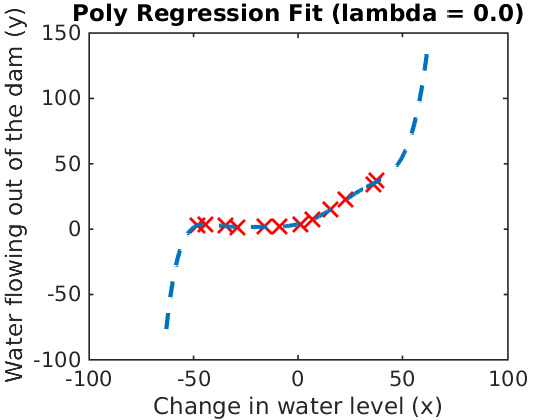

ans =
        2512           8

In [10]:
x = (min(X) - 15: 0.05 : max(X) + 25)';
xx=zeros(numel(x),p);
size(xx)
for i=1:p
    xx(:, i) = x.^i;
end
xx = bsxfun(@minus, xx, mu);
xx = bsxfun(@rdivide, xx, sigma);
xx = [ones(size(xx, 1), 1) xx];

% Plot training data and fit
figure();
hold on;
plot(X, y, 'rx', 'MarkerSize', 10, 'LineWidth', 1.5);
plot(x, xx * theta, '--', 'LineWidth', 2)
hold off
    
xlabel('Change in water level (x)');
ylabel('Water flowing out of the dam (y)');
title (sprintf('Poly Regression Fit (lambda = %.1f)', lambda));
box on

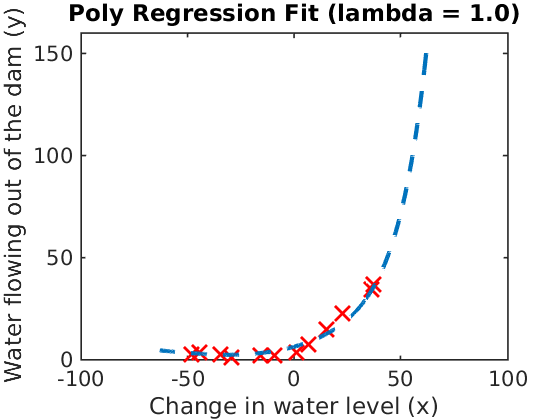

Last iteration (  66 th) | Cost: 7.268148e+00

In [11]:
lambda = 1;
initial_theta = zeros(size(X_poly, 2), 1); 
costFunction = @(t) funcs_07_BiasVariance_linearRegCostFunction(X_poly, y, t, lambda);
theta = funcs_fmincg(costFunction, initial_theta, options);

% Plot training data and fit
figure();
hold on;
plot(X, y, 'rx', 'MarkerSize', 10, 'LineWidth', 1.5);
plot(x, xx * theta, '--', 'LineWidth', 2)
hold off
    
xlabel('Change in water level (x)');
ylabel('Water flowing out of the dam (y)');
title (sprintf('Poly Regression Fit (lambda = %.1f)', lambda));
box on

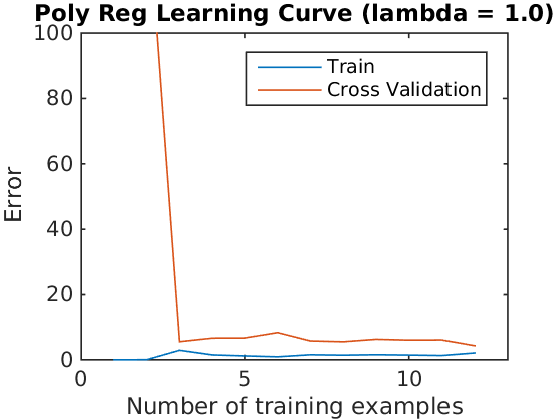

Last iteration (  20 th) | Cost: 3.688359e-125
Last iteration (  20 th) | Cost: 7.269436e-02
Last iteration (  20 th) | Cost: 1.849879e+01
Last iteration (  20 th) | Cost: 1.457586e+01
Last iteration (  20 th) | Cost: 1.166073e+01
Last iteration (  20 th) | Cost: 1.011885e+01
Last iteration (  20 th) | Cost: 9.416375e+00
Last iteration (  20 th) | Cost: 8.256229e+00
Last iteration (  20 th) | Cost: 7.802080e+00
Last iteration (  20 th) | Cost: 7.064459e+00
Last iteration (  20 th) | Cost: 6.423857e+00
Last iteration (  20 th) | Cost: 7.268354e+00

In [12]:
lambda = 1;
options = optimset('MaxIter', 20, 'GradObj', 'on');

%  the train and cross validation set errors for a learning curve
error_train = zeros(m_train, 1);
error_val   = zeros(m_train, 1);

for i=1:m_train
    xi=X_poly(1:i,:);
    yi=y(1:i);
    
    initial_theta = zeros(size(xi, 2), 1); 
    costFunction = @(t) funcs_07_BiasVariance_linearRegCostFunction(xi, yi, t, lambda);
    theta = funcs_fmincg(costFunction, initial_theta, options);

    [error_train(i), ~] = funcs_07_BiasVariance_linearRegCostFunction(xi, yi, theta, 0);
    [error_val(i), ~] = funcs_07_BiasVariance_linearRegCostFunction(X_poly_val, yval, theta, 0);
end

figure();
plot(1:m_train, error_train, 1:m_train, error_val);

title(sprintf('Poly Reg Learning Curve (lambda = %.1f)', lambda));
xlabel('Number of training examples')
ylabel('Error')
axis([0 13 0 100])
legend('Train', 'Cross Validation')

In [13]:
fprintf('Polynomial Regression (lambda = %.1f)\n\n', lambda);
fprintf('# Training Examples\tTrain Error\tCross Validation Error\n');
for i = 1:m_train
    fprintf('  \t%d\t\t%f\t%f\n', i, error_train(i), error_val(i));
end

Polynomial Regression (lambda = 1.0)

# Training Examples	Train Error	Cross Validation Error
  	1		0.000000	138.846777
  	2		0.045772	143.522890
  	3		2.911375	5.534713
  	4		1.499675	6.608547
  	5		1.197127	6.648790
  	6		0.923850	8.300147
  	7		1.540724	5.751953
  	8		1.420442	5.510791
  	9		1.554811	6.247537
  	10		1.447319	6.001924
  	11		1.313438	6.046771
  	12		2.090919	4.290000

### Validation for Selecting Lambda

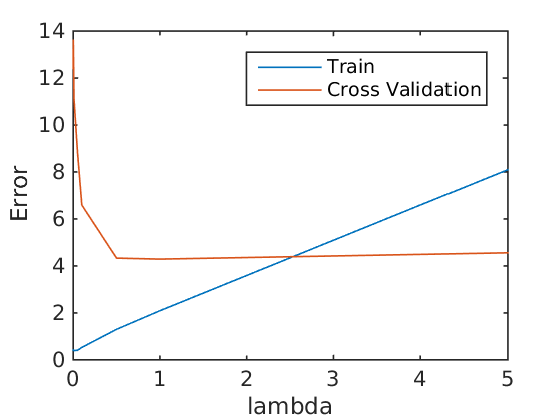

Last iteration (  20 th) | Cost: 4.147094e-01
Last iteration (  20 th) | Cost: 4.652180e-01
Last iteration (  20 th) | Cost: 5.174398e-01
Last iteration (  20 th) | Cost: 9.511195e-01
Last iteration (  20 th) | Cost: 1.466264e+00
Last iteration (  20 th) | Cost: 4.445319e+00
Last iteration (  20 th) | Cost: 7.268354e+00
Last iteration (  20 th) | Cost: 2.230773e+01
lambda		Train Error	Validation Error
 0.000000	0.414709	12.402432
 0.002000	0.438328	13.638422
 0.010000	0.395108	11.099393
 0.050000	0.407578	8.848573
 0.100000	0.530848	6.590829
 0.500000	1.300361	4.331895
 1.000000	2.090919	4.290000
 5.000000	8.094122	4.558193

In [14]:
options = optimset('MaxIter', 20, 'GradObj', 'on');

lambda_vec = [0 0.002 0.01 0.05 0.1 0.5 1 5]';
error_train = zeros(length(lambda_vec), 1);
error_val = zeros(length(lambda_vec), 1);

for i=1:length(lambda_vec)
    lambda = lambda_vec(i);
    initial_theta = zeros(size(xi, 2), 1); 
    costFunction = @(t) funcs_07_BiasVariance_linearRegCostFunction(xi, yi, t, lambda);
    theta = funcs_fmincg(costFunction, initial_theta, options);    

    [error_train(i), ~] = funcs_07_BiasVariance_linearRegCostFunction(X_poly, y, theta, 0);
    [error_val(i), ~] = funcs_07_BiasVariance_linearRegCostFunction(X_poly_val, yval, theta, 0);
end


close all;
plot(lambda_vec, error_train, lambda_vec, error_val);
legend('Train', 'Cross Validation');
xlabel('lambda');
ylabel('Error');

fprintf('lambda\t\tTrain Error\tValidation Error\n');
for i = 1:length(lambda_vec)
fprintf(' %f\t%f\t%f\n', ...
            lambda_vec(i), error_train(i), error_val(i));
end